# EDA 

In [2]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./dataframes/desafio_indicium_imdb.csv')

### Características da base de dados

In [4]:
display(df.shape)

(999, 16)

In [5]:
display(df.head())

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [6]:
display(df.columns)

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


None

In [8]:
display(df.describe())

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [9]:
display(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Distribuição dos anos de lançamentos

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


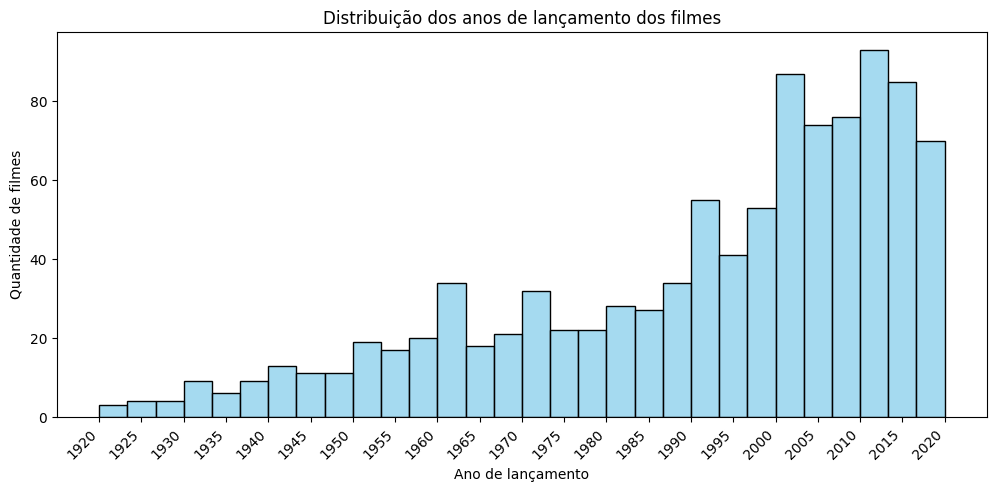

In [10]:
# Garantindo que Released_Year é numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Removendo valores inválidos (NaN)
df = df.dropna(subset=['Released_Year'])

# Convertendo para inteiro
df['Released_Year'] = df['Released_Year'].astype(int)

# Agora podemos plotar
plt.figure(figsize=(12,5))
sns.histplot(df['Released_Year'], bins=30, kde=False, color="skyblue")

plt.title("Distribuição dos anos de lançamento dos filmes")
plt.xlabel("Ano de lançamento")
plt.ylabel("Quantidade de filmes")

# Ticks de 5 em 5 anos
anos = range(df['Released_Year'].min(), df['Released_Year'].max()+1, 5)
plt.xticks(anos, rotation=45, ha="right")

plt.show()


### Gêneros mais comuns

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

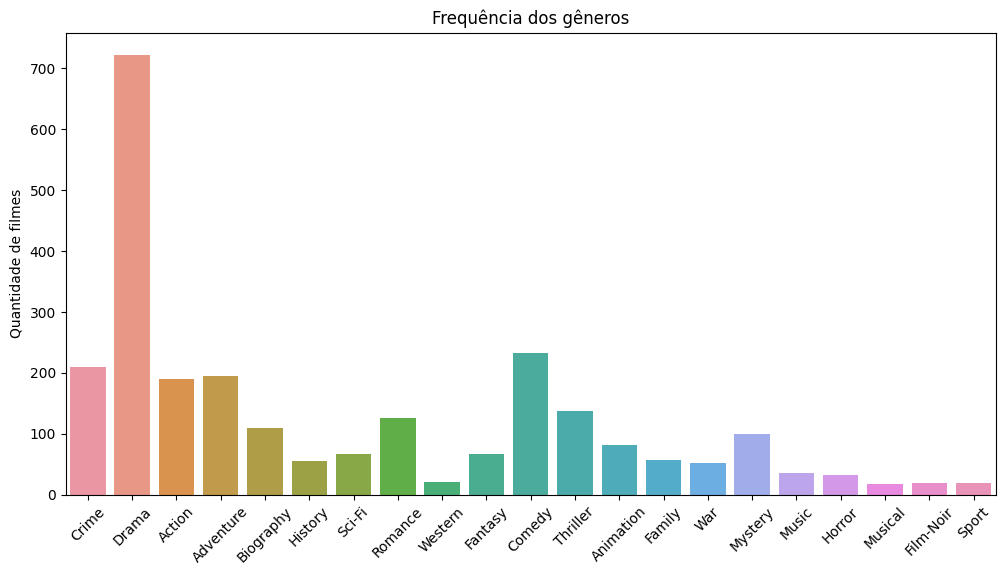

In [11]:
# Quebrando gêneros (separados por vírgula)
from collections import Counter

genres = df['Genre'].dropna().str.split(", ")
genre_counts = Counter([g for sublist in genres for g in sublist])

plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Frequência dos gêneros")
plt.ylabel("Quantidade de filmes")
plt.show()

### Relação entre IMDB e Metascore

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


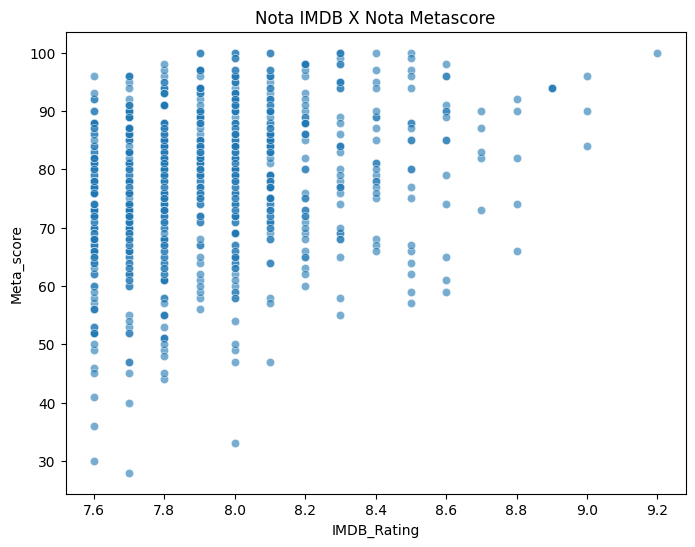

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="IMDB_Rating", y="Meta_score", data=df, alpha=0.6)
plt.title("Nota IMDB X Nota Metascore")
plt.show()

### Relação entre duração do filme e sua avaliação

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


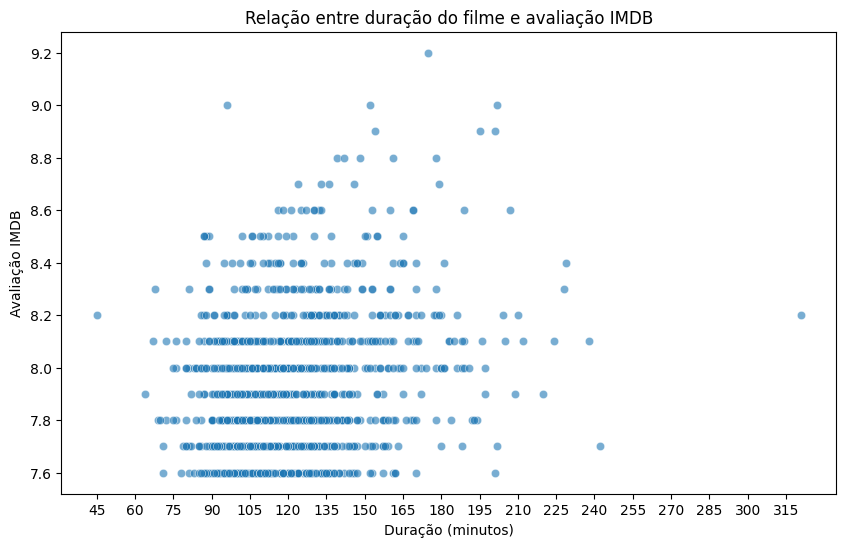

In [13]:
# retirando "min" de Runtime e deixando apenas valor numérico
if df['Runtime'].dtype == 'object':
    df['Runtime'] = df['Runtime'].str.replace(" min", "", regex=False)
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
else:
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(x="Runtime", y="IMDB_Rating", data=df, alpha=0.6)

plt.title("Relação entre duração do filme e avaliação IMDB")
plt.xlabel("Duração (minutos)")
plt.ylabel("Avaliação IMDB")

# intervalo de 10 em 10 minutos
min_runtime = int(df["Runtime"].min())
max_runtime = int(df["Runtime"].max())

plt.xticks(range(min_runtime, max_runtime+1, 15))

plt.show()

### Relação entre número de votos e bilheteria

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


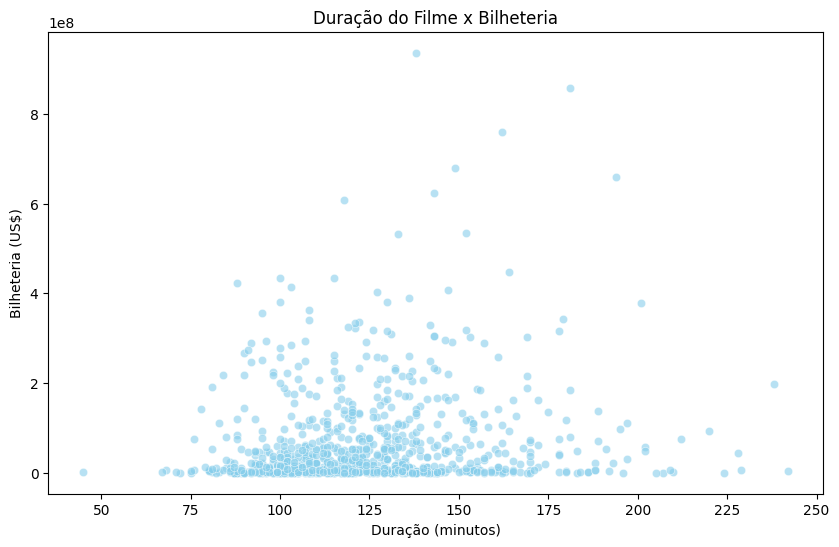

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


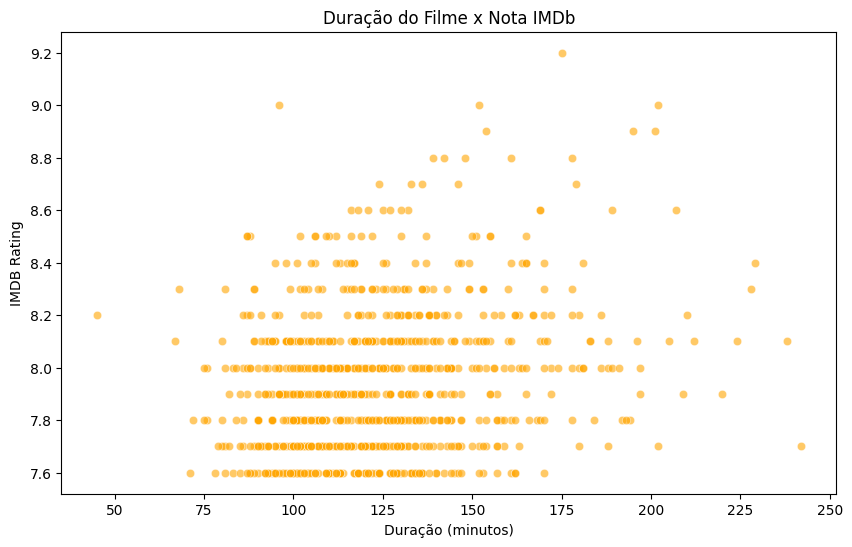

In [17]:
# convertendo tempo de duração para numérico
def parse_runtime(x):
    try:
        return int(str(x).replace(' min',''))
    except:
        return np.nan

df['Runtime'] = df['Runtime'].apply(parse_runtime)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# descarte de valores inválidos
df_plot = df.dropna(subset=['Runtime', 'Gross', 'IMDB_Rating'])

import matplotlib.pyplot as plt
import seaborn as sns

# Duração x Bilheteria
plt.figure(figsize=(10,6))
sns.scatterplot(x='Runtime', y='Gross', data=df_plot, alpha=0.6, color='skyblue')
plt.title('Duração do Filme x Bilheteria')
plt.xlabel('Duração (minutos)')
plt.ylabel('Bilheteria (US$)')
plt.show()

# Duração x Nota IMDb
plt.figure(figsize=(10,6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df_plot, alpha=0.6, color='orange')
plt.title('Duração do Filme x Nota IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('IMDB Rating')
plt.show()


### Correlação entre variáveis numéricas

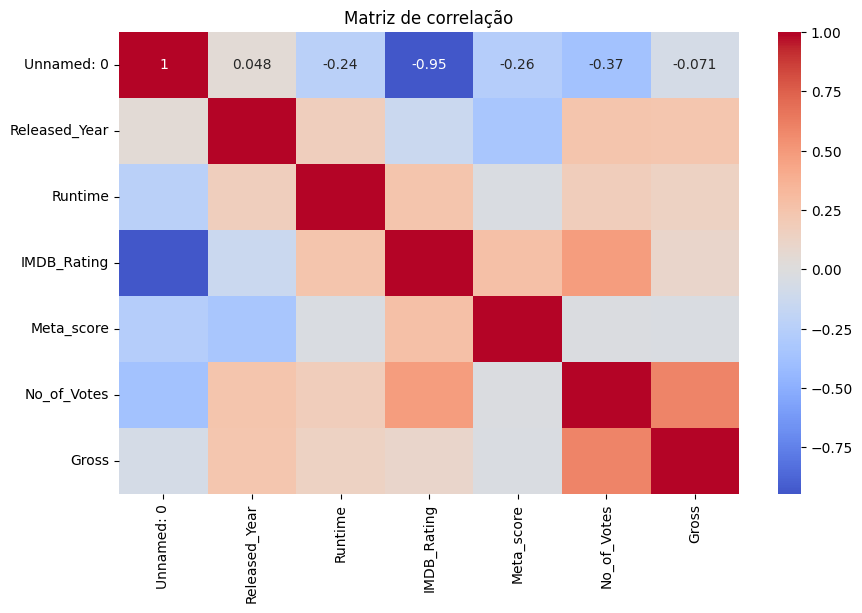

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlação")
plt.show()

### Rank de gêneros por receita

In [19]:
# removendo caracteres indesejados e converter para numérico
df['Gross'] = df['Gross'].replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# explodindo a coluna de gêneros
base_genres = df.dropna(subset=['Genre']).copy()
base_genres['Genre'] = base_genres['Genre'].str.split(", ")
base_genres = base_genres.explode('Genre')

genre_gross = base_genres.groupby("Genre")['Gross'].agg(['sum', 'mean', 'count']).sort_values(by="sum", ascending=False)
genre_gross.rename(columns={'sum': 'Receita_Total', 'mean': 'Receita_Média', 'count': 'Qtd_Filmes'}, inplace=True)

display(genre_gross)

,Receita_Total,Receita_Média,Qtd_Filmes
Genre,,,
Adventure,2.800048e+10,1.656833e+08,169
Drama,2.729544e+10,4.587469e+07,595
Action,2.203333e+10,1.412393e+08,156
Comedy,1.224793e+10,6.412530e+07,191
Sci-Fi,9.029610e+09,1.480264e+08,61
Animation,8.573824e+09,1.279675e+08,67
Crime,6.956304e+09,4.068014e+07,171
Thriller,6.454429e+09,5.867663e+07,110
Fantasy,6.082543e+09,1.086168e+08,56


c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


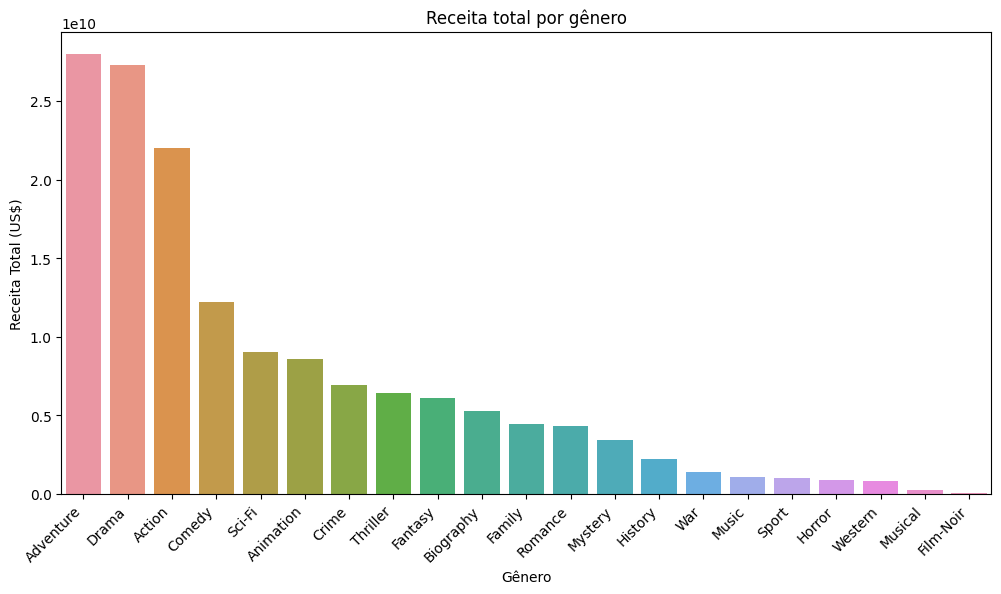

In [20]:
# plot da receita total por gênero
plt.figure(figsize=(12,6))
sns.barplot(x=genre_gross.index, y=genre_gross['Receita_Total'])
plt.xticks(rotation=45, ha="right")
plt.title("Receita total por gênero")
plt.ylabel("Receita Total (US$)")
plt.xlabel("Gênero")
plt.show()

### Análise dos valores ausentes

In [21]:
# contagem e proporção de valores ausentes
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
display(missing_df.sort_values(by='Missing', ascending=False))

,Missing,Percent
Gross,169,16.933868
Meta_score,157,15.731463
Certificate,101,10.120240
Unnamed: 0,0,0.000000
Series_Title,0,0.000000
Released_Year,0,0.000000
Runtime,0,0.000000
Genre,0,0.000000
IMDB_Rating,0,0.000000
Overview,0,0.000000


### Distribuições detalhadas e outliers

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


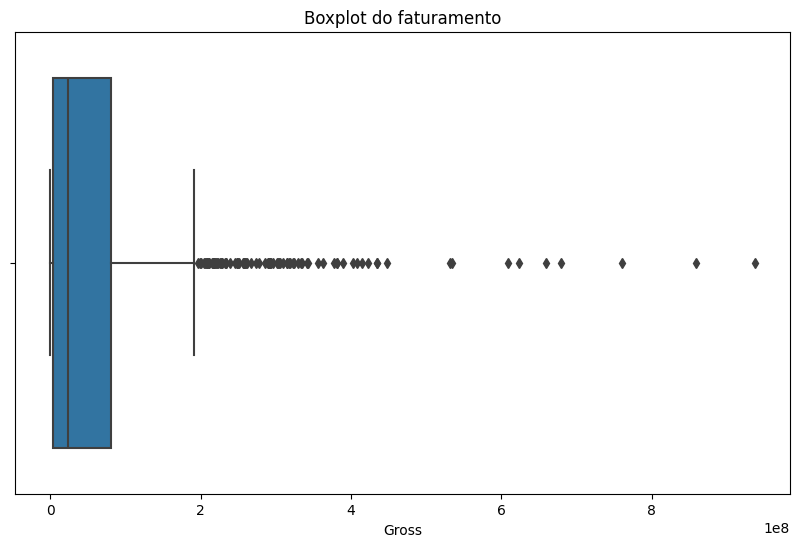

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


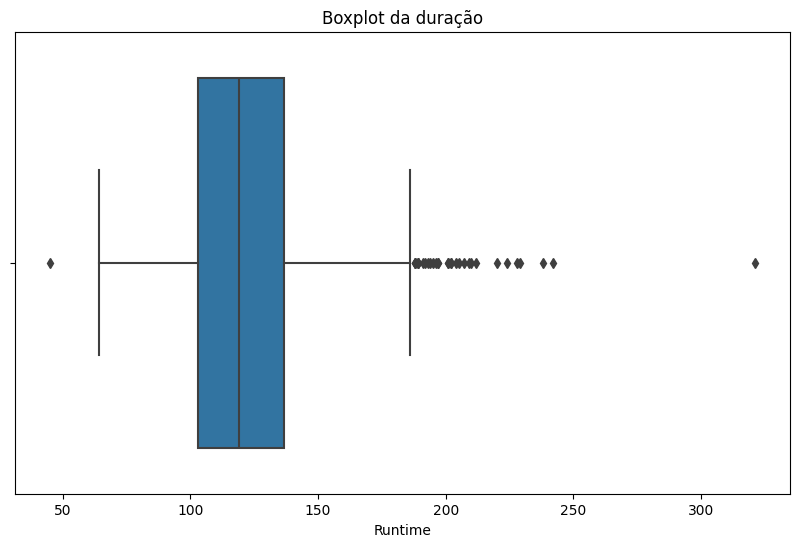

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


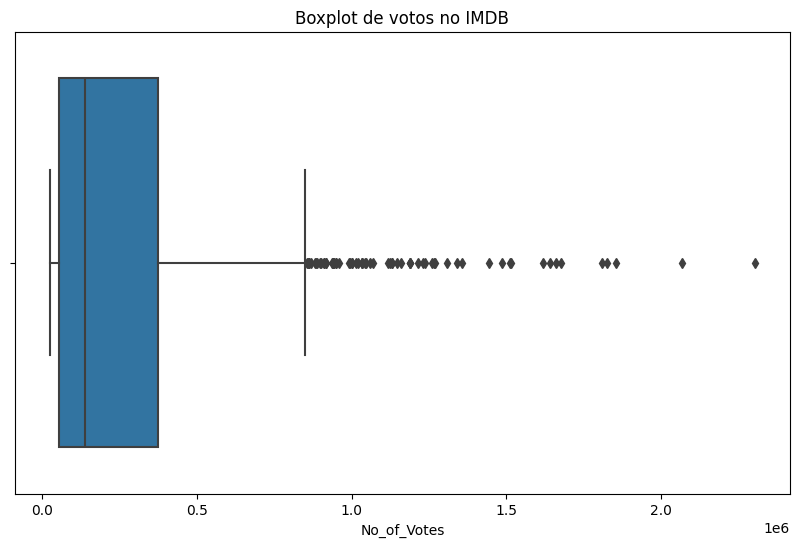

In [22]:
# boxplot para Gross
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Gross'])
plt.title("Boxplot do faturamento")
plt.show()

# boxplot para Runtime
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Runtime'])
plt.title("Boxplot da duração")
plt.show()

# boxplot para No_of_Votes
plt.figure(figsize=(10,6))
sns.boxplot(x=df['No_of_Votes'])
plt.title("Boxplot de votos no IMDB")
plt.show()


### Análise categórica

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


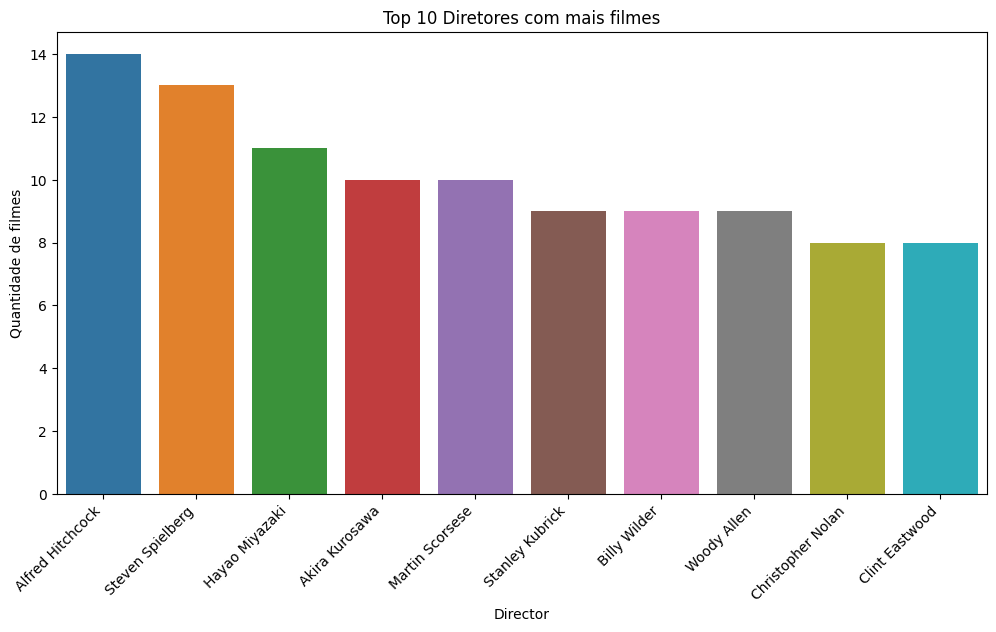

In [23]:
# Top 10 Diretores com mais filmes
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Diretores com mais filmes")
plt.ylabel("Quantidade de filmes")
plt.show()

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


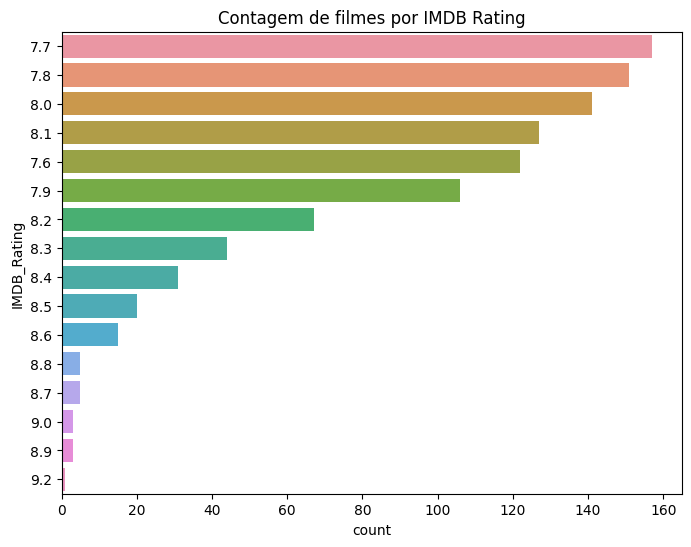

In [24]:
# contagem por avaliação IMDB
plt.figure(figsize=(8,6))
sns.countplot(y='IMDB_Rating', data=df, order=df['IMDB_Rating'].value_counts().index)
plt.title("Contagem de filmes por IMDB Rating")
plt.show()

### Média de IMDB por gênero

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


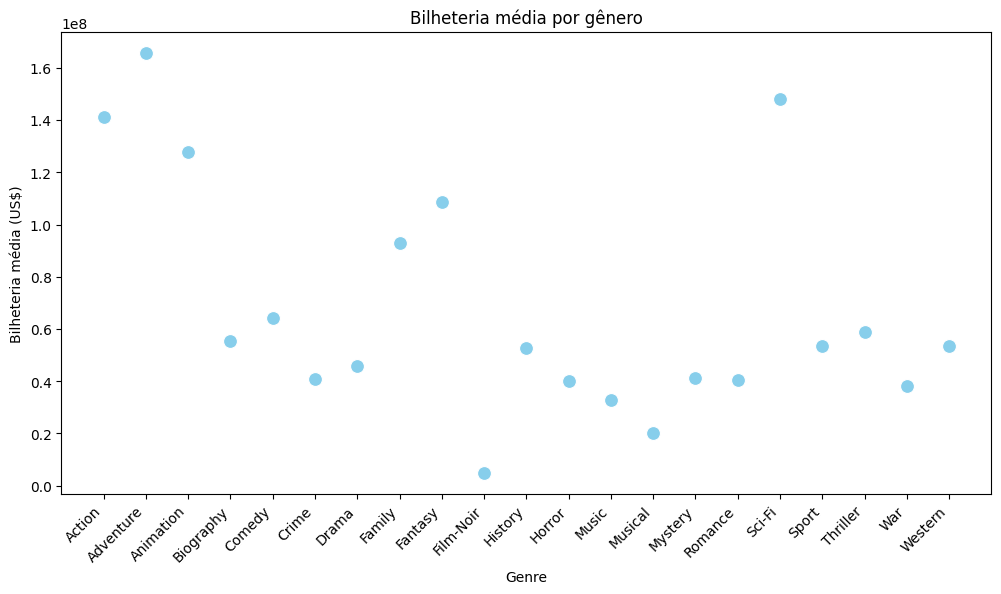

In [25]:
avg_gross_genre = base_genres.groupby('Genre')['Gross'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(x='Genre', y='Gross', data=avg_gross_genre, s=100, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Bilheteria média por gênero")
plt.ylabel("Bilheteria média (US$)")
plt.show()


### Análise temporal

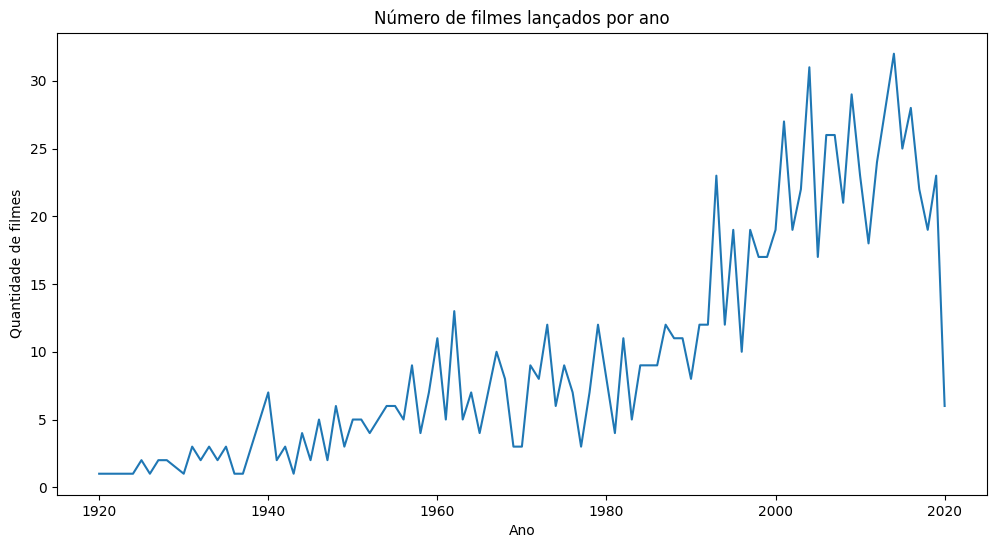

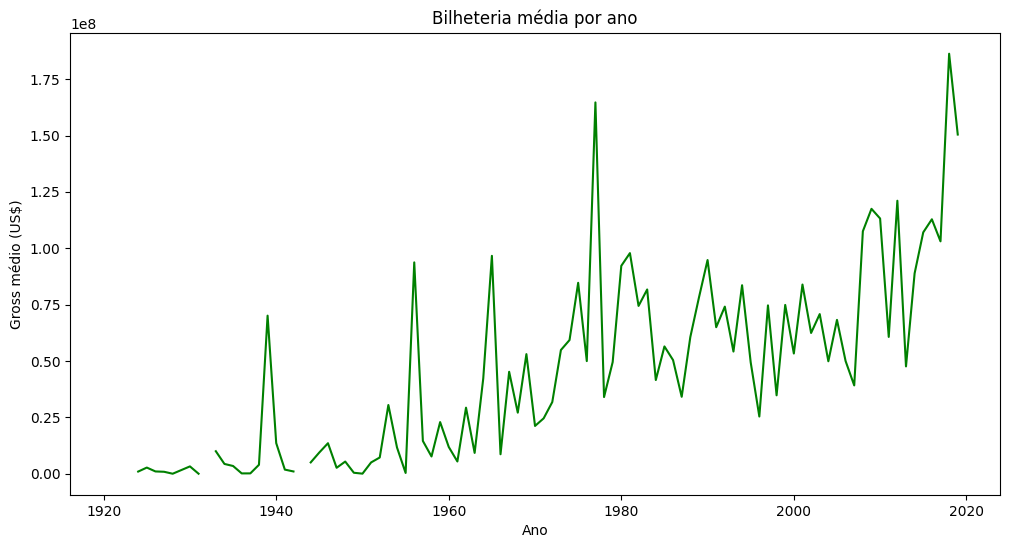

In [26]:
# número de filmes lançados por ano
films_per_year = df.groupby('Released_Year').size()
plt.figure(figsize=(12,6))
films_per_year.plot()
plt.title("Número de filmes lançados por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de filmes")
plt.show()

# bilheteria média por ano
gross_per_year = df.groupby('Released_Year')['Gross'].mean()
plt.figure(figsize=(12,6))
gross_per_year.plot(color="green")
plt.title("Bilheteria média por ano")
plt.xlabel("Ano")
plt.ylabel("Gross médio (US$)")
plt.show()

# nota-se uma queda considerável de lançamentos em 2020 (pandemia, clr)

## Testando hipóteses

### Filmes com mais votos tendem a ter nota IMDB mais alta

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


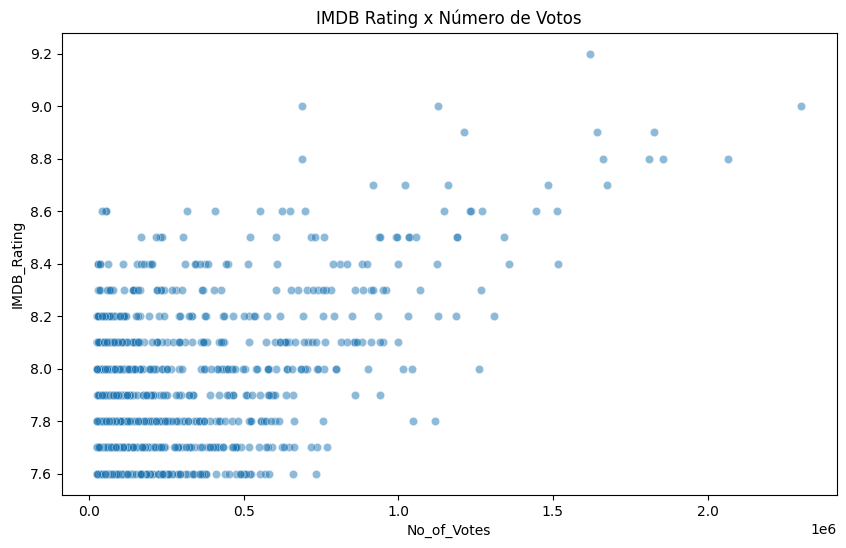

Correlação Spearman: 0.21, p-value: 0.0000


In [27]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df, alpha=0.5)
plt.title("IMDB Rating x Número de Votos")
plt.show()

# teste de correlação de Spearman
corr, p_value = stats.spearmanr(df['No_of_Votes'], df['IMDB_Rating'], nan_policy='omit')
print(f"Correlação Spearman: {corr:.2f}, p-value: {p_value:.4f}")


### Gêneros influenciam na bilheteria?

In [28]:
# Criando df_genres a partir de df
df_genres = df.dropna(subset=['Genre']).copy()
df_genres['Genre'] = df_genres['Genre'].str.split(", ")
df_genres = df_genres.explode('Genre')

In [29]:
from scipy.stats import f_oneway

In [30]:
# criando listas de bilheteria por gênero
genre_groups = [group['Gross'].dropna() for name, group in df_genres.groupby('Genre')]

# Teste ANOVA
f_stat, p_value = f_oneway(*genre_groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4e}")

ANOVA F-statistic: 17.36, p-value: 2.0597e-56


In [31]:
print("Hipótese 2: Diferença de bilheteria entre gêneros")
genre_groups = [group['Gross'].dropna() for name, group in df_genres.groupby('Genre')]
f_stat, p_value = f_oneway(*genre_groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4e}\n")

Hipótese 2: Diferença de bilheteria entre gêneros
ANOVA F-statistic: 17.36, p-value: 2.0597e-56



### Atores/atrizes influenciam na bilheteria?

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


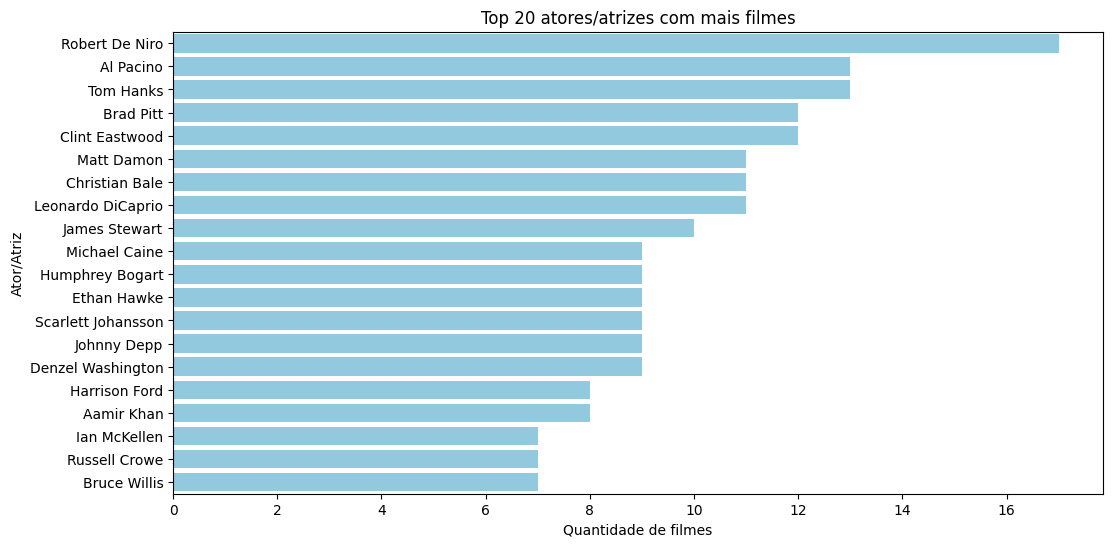

In [32]:
actor_cols = ['Star1', 'Star2', 'Star3', 'Star4']  
actors = pd.concat([df[col] for col in actor_cols]).dropna()

top_actors = actors.value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values, y=top_actors.index, color="skyblue")
plt.title("Top 20 atores/atrizes com mais filmes")
plt.xlabel("Quantidade de filmes")
plt.ylabel("Ator/Atriz")
plt.show()

In [33]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

actor_cols = ['Star1', 'Star2', 'Star3', 'Star4']  
actor_df = df.melt(
    id_vars=['Gross'], 
    value_vars=actor_cols, 
    value_name='Actor'
).dropna()

In [34]:
# seleção dos 20 atores mais frequentes
top_actors = actor_df['Actor'].value_counts().head(20).index
actor_df_top = actor_df[actor_df['Actor'].isin(top_actors)]

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


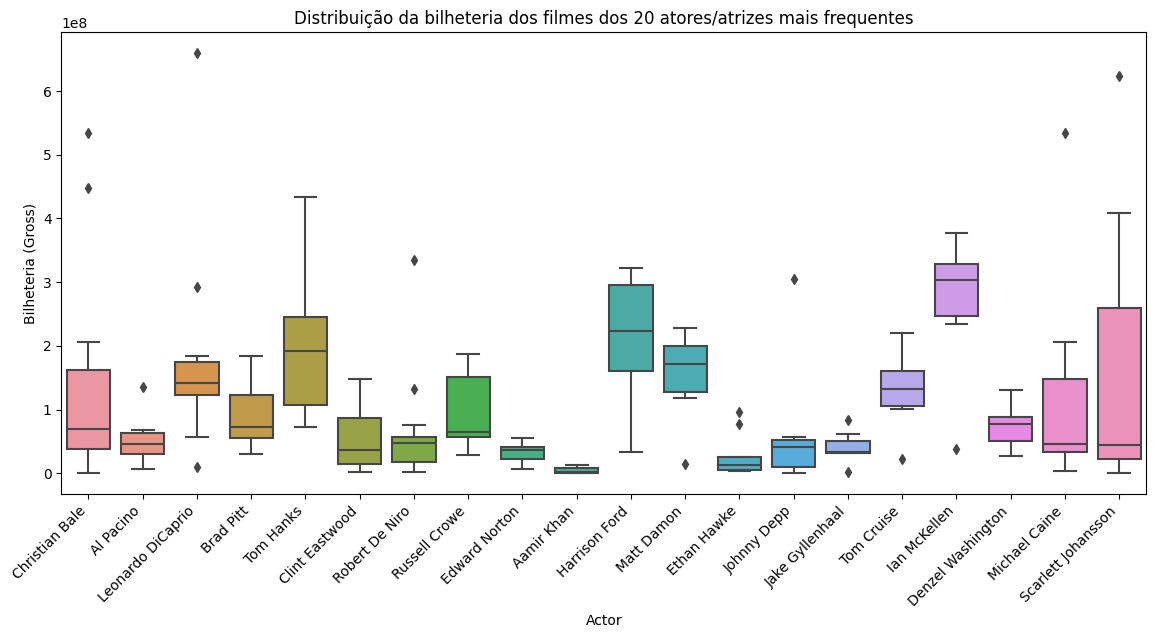

In [35]:
# plot da distruibuição do faturamento por ator
plt.figure(figsize=(14,6))
sns.boxplot(x='Actor', y='Gross', data=actor_df_top)
plt.xticks(rotation=45, ha="right")
plt.title("Distribuição da bilheteria dos filmes dos 20 atores/atrizes mais frequentes")
plt.ylabel("Bilheteria (Gross)")
plt.show()

In [36]:
# teste ANOVA
actor_groups = [group['Gross'].dropna() for name, group in actor_df_top.groupby('Actor')]
f_stat, p_value = f_oneway(*actor_groups)

print("Hipótese: diferença de bilheteria entre atores/atrizes")
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4e}")

Hipótese: diferença de bilheteria entre atores/atrizes
ANOVA F-statistic: 4.28, p-value: 1.0014e-07


### Duração do filme influencia na bilheteria/avaliação crítica?

In [37]:
# retirando "min" do valor de duração de cada filme
def parse_runtime(x):
    try:
        return int(str(x).replace(' min',''))
    except:
        return np.nan

df['Runtime'] = df['Runtime'].apply(parse_runtime)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# excluindo valores ausentes
df_plot = df.dropna(subset=['Runtime', 'Gross', 'IMDB_Rating'])

# Respostas

### 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


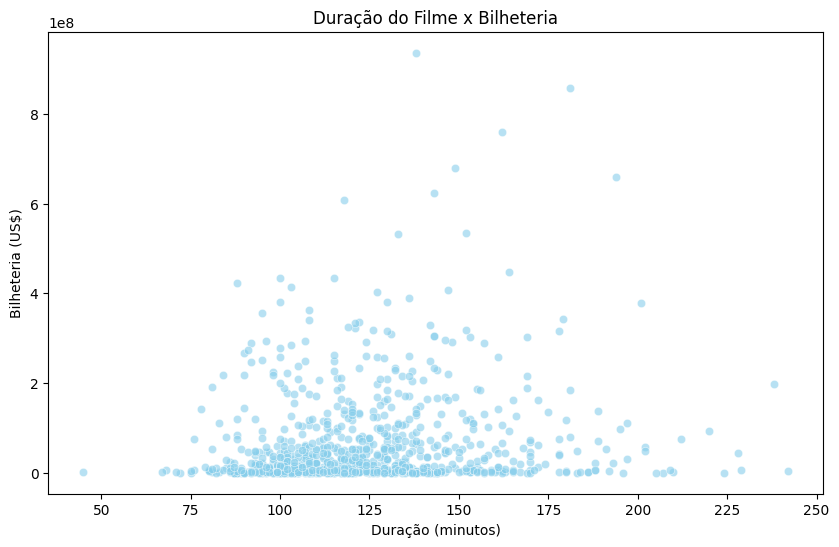

c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Isac\Desktop\teste\desafio_insidium\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


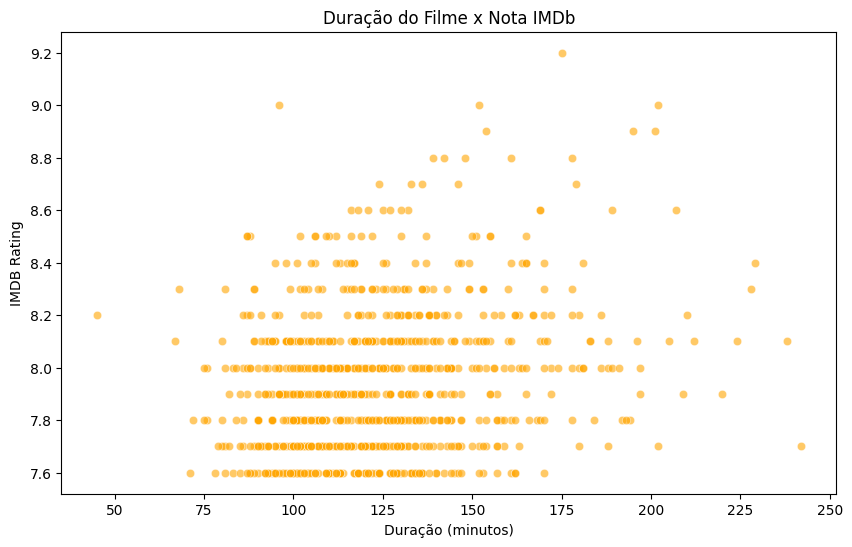

In [38]:
# duração x bilheteria
plt.figure(figsize=(10,6))
sns.scatterplot(x='Runtime', y='Gross', data=df_plot, alpha=0.6, color='skyblue')
plt.title('Duração do Filme x Bilheteria')
plt.xlabel('Duração (minutos)')
plt.ylabel('Bilheteria (US$)')
plt.show()

# duração x nota IMDb
plt.figure(figsize=(10,6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df_plot, alpha=0.6, color='orange')
plt.title('Duração do Filme x Nota IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('IMDB Rating')
plt.show()

O EDA está logo acima.

### 2. Responda também às seguintes perguntas:
#### a. Qual filme você recomendaria para uma pessoa que você não conhece?
Como a preferência da pessoa é desconhecida, é mais seguro recomendar um filme com boas críticas/faturamento, já que de acordo com o EDA, filmes com alta popularidade e faturamento agradam o público em geral. Portanto, The Dark Knight ou Forrest Gump são escolhas seguras, mas é possível supor que qualquer filme dentro do top 10 de bilheteria e alta nota de crítica seria viável.

In [39]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
top10 = df.sort_values(by=['IMDB_Rating', 'Gross'], ascending=[False, False]).head(10)

top10[['Series_Title', 'IMDB_Rating', 'Gross']]

,Series_Title,IMDB_Rating,Gross
0,The Godfather,9.2,134966411.0
1,The Dark Knight,9.0,534858444.0
2,The Godfather: Part II,9.0,57300000.0
3,12 Angry Men,9.0,4360000.0
4,The Lord of the Rings: The Return of the King,8.9,377845905.0
5,Pulp Fiction,8.9,107928762.0
6,Schindler's List,8.9,96898818.0
10,Forrest Gump,8.8,330252182.0
9,The Lord of the Rings: The Fellowship of the Ring,8.8,315544750.0
7,Inception,8.8,292576195.0


#### b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
De acordo com os testes realizados, o gênero influencia bastante na faturamento, evidenciado pelo teste ANOVA. Além disso, Rating é um fator a ser considerado, porém menos relevante do que o gênero. Outros fatores são o ano de lançamento (filmes mais recentes tendem a faturar mais), e o tempo de duração (filmes muito curtos/muito longos tendem a ter menor faturamento, evidenciado pelo teste Anova)

#### c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Sim, é possível inferir o gênero a partir do Overview, pois certos termos são mais frequentes em determinados tipos de filmes. Uma análise de NLP ou até uma classificação de texto pode ser aplicada para prever o gênero a partir dessa coluna.

In [40]:
# tentei criar uma forma de prever, mas não deu muito certo 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# excluindo gêneros/overview nulos
df_text = df.dropna(subset=['Overview', 'Genre'])

# pegando apenas o primeiro gênero
df_text['Primary_Genre'] = df_text['Genre'].str.split(',').str[0]

X = df_text['Overview']
y = df_text['Primary_Genre']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_vect = vectorizer.fit_transform(X)

# divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# classificador
clf = MultinomialNB()
clf.fit(X_train, y_train)

# previsão e acurávia
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acc:.2f}")

# Testando com um novo Overview
novo_overview = ["Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."]
novo_vect = vectorizer.transform(novo_overview)
genero_previsto = clf.predict(novo_vect)
print(f"Gênero previsto: {genero_previsto[0]}")

Acurácia do modelo: 0.36
Gênero previsto: Drama


### 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Para prever a nota do IMDb eu utilizei regressao, já que o alvo (IMDB_Rating) é contínuo. Foram usadas as variáveis ano de lançamento, classificação indicativa, duração, gênero, Meta_score, número de votos e bilheteria. Variáveis categóricas foram transformadas com One-Hot Encoding e numéricas receberam imputação pela mediana.

O modelo escolhido foi RandomForestRegressor, que captura relações não lineares e interações entre variáveis.

O desempenho foi avaliado pelo RMSE, que mede o erro médio entre previsões e valores reais, penalizando grandes desvios e fornecendo interpretação direta em unidades da nota do IMDb.

In [41]:
# bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
df = pd.read_csv("./dataframes/desafio_indicium_imdb.csv")

In [43]:
# pré-processamento do dataset
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [44]:
# definindo x e y
X = df[['Released_Year', 'Certificate', 'Runtime', 'Genre', 'Meta_score', 'No_of_Votes', 'Gross']]
y = df['IMDB_Rating']

In [45]:
# definindo colunas categóricas e numéricas
categorical = ['Certificate', 'Genre']
numeric = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']

# pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),   # substitui NaN pela categoria mais frequente
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical),

        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # substitui NaN pela mediana
        ]), numeric)
    ]
)

In [46]:
# criação do modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=200))
])

In [47]:
# divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Certificate', 'Genre']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Released_Year', 'Runtime',
                                                   'Meta_score', 'No_of_Votes',
                                                   'Gross'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [48]:
# teste
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.20


### 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


### Qual seria a nota do IMDB?

De acordo com meu modelo treinado, a nota foi de 7,75.

In [49]:
# filme a ser testado
novo_filme = pd.DataFrame([{
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Meta_score': 20,
    'No_of_Votes': 110000,
    'Gross': 90000000
}])

In [50]:
# previsão
nota_prevista = model.predict(novo_filme)
print(f"Nota prevista do IMDb: {nota_prevista[0]:.2f}")

Nota prevista do IMDb: 7.75


In [51]:
# salvando modelo
import joblib
from sklearn.metrics import mean_squared_error

joblib.dump(model, "modelo_imdb.pkl")

['modelo_imdb.pkl']